In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

In [40]:
#Chris mDOM data
data_mDOMc = np.genfromtxt("../files/mDOM_effvol_chris.txt", delimiter=" ", dtype=float, skip_header=1)
depth_mdc, effvol_mdc, u_effvol_mdc = data_mDOMc.T
effvol_mdc /= 178*25 #transformation of positron eff. volume to single photon eff. volume, mDOM sim at 25 MeV

#My mDOM data using Chris' effvol vs. absorption length relation
data_mDOM = np.genfromtxt("../files/mDOM_effvol.txt", delimiter=" ", dtype=float)
depth_md, effvol_md = data_mDOM.T
depth_md = 1948.07-depth_md

#Benedikt's effective volume for the IC80 DOMs
data_i3 = np.genfromtxt("../files/effectivevolume_benedikt_AHA_normalDoms.txt",
                    delimiter=" ", dtype=float)
depth_i3, effvol_i3 = data_i3.T
depth_i3 = 1948.07-depth_i3 #depth relative to the surface

#HQE DOMs have a 1.35 higher QE PMTs
effvol_dc = effvol_i3*1.35

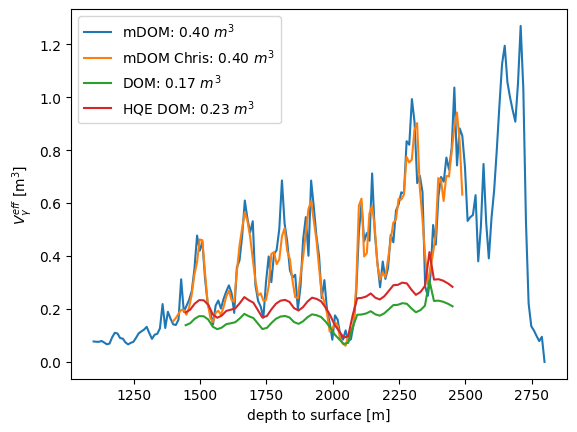

In [41]:
fig, ax = plt.subplots(1,1)
ax.plot(depth_md, effvol_md, label = r"mDOM: {:.2f} $m^3$".format(effvol_md.mean()))
ax.plot(depth_mdc, effvol_mdc, label = r"mDOM Chris: {:.2f} $m^3$".format(effvol_mdc.mean()))
ax.plot(depth_i3, effvol_i3, label = r"DOM: {:.2f} $m^3$".format(effvol_i3.mean()))
ax.plot(depth_i3, effvol_dc, label = r"HQE DOM: {:.2f} $m^3$".format(effvol_dc.mean()))
ax.set_xlabel("depth to surface [m]")
ax.set_ylabel(r"$V_{\gamma}^{eff}$ [m$^3$]")
ax.legend()
plt.show()

In [13]:
#depth_md = 1948.07-depth_md
#data = np.array([depth_md, effvol_md])
#np.savetxt("../files/mDOM_effvol_outdated.txt", data.T, delimiter = " ", newline = "\n", fmt = ["%3.2f","%0.10f"])

In [58]:
depth = np.linspace(1450,2450,100,endpoint=True)

effvol_ip_i3 = PchipInterpolator(depth_i3,effvol_i3)(depth)
effvol_ip_dc = PchipInterpolator(depth_i3,effvol_dc)(depth)
effvol_ip_mdc = PchipInterpolator(depth_mdc,effvol_mdc)(depth)
effvol_ip_md = PchipInterpolator(depth_md,effvol_md)(depth)


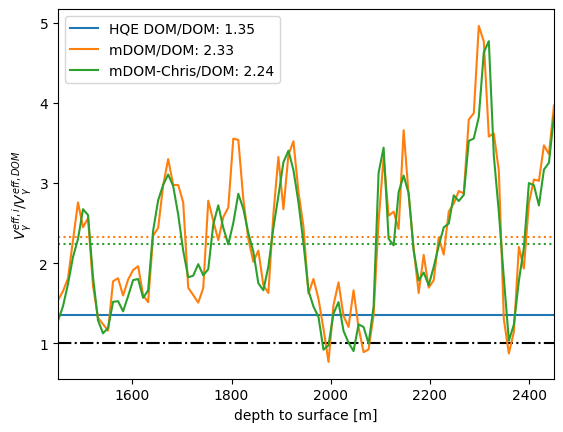

In [59]:
fig, ax = plt.subplots(1,1)
ax.axhline(1, color = 'k', ls = '-.')
ax.axhline((effvol_ip_md/effvol_ip_i3).mean(),color = 'C1', ls = ':')
ax.axhline((effvol_ip_mdc/effvol_ip_i3).mean(),color = 'C2', ls = ':')

ax.plot(depth, effvol_ip_dc/effvol_ip_i3, label = r"HQE DOM/DOM: {:.2f}".format((effvol_ip_dc/effvol_ip_i3).mean()))
ax.plot(depth, effvol_ip_md/effvol_ip_i3, label = r"mDOM/DOM: {:.2f}".format((effvol_ip_md/effvol_ip_i3).mean()))
ax.plot(depth, effvol_ip_mdc/effvol_ip_i3, label = r"mDOM-Chris/DOM: {:.2f}".format((effvol_ip_mdc/effvol_ip_i3).mean()))
ax.set_xlabel("depth to surface [m]")
ax.set_ylabel(r"$V_{\gamma}^{eff, i}/V_{\gamma}^{eff, DOM}$")
ax.set_xlim((1450,2450))
ax.legend()
plt.show()